In [1]:
# import required modules
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient
from utils import *
%matplotlib inline
%load_ext tensorboard

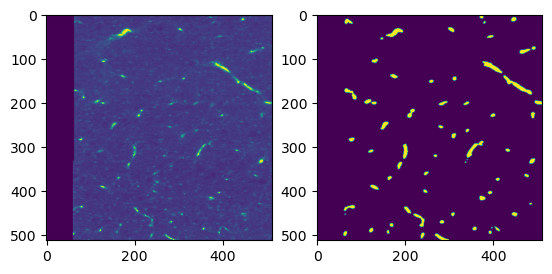

In [2]:
# import train set
train_filepath = "train"
train_dataset = AngioDataset(train_filepath,patch_size=[1, 512, 512])

# show an image and corresponding mask
image_index = 10
train_dataset_raw = train_dataset[image_index][0]
train_dataset_mask = train_dataset[image_index][1]

fig, ax = plt.subplots(1,2)

ax[0].imshow(train_dataset_raw[0,:,:])
ax[1].imshow(train_dataset_mask[0,:,:])


In [3]:
# import validation set
val_filepath = "val"
val_dataset = AngioDataset(val_filepath,patch_size=[1, 512, 512])
print(len(val_dataset))

24


In [4]:
# pass data to DataLoader
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1)

# pass to device
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

# set model's parameters
final_activation="Sigmoid"
model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation).to(device)

# set loss function
loss_function = nn.MSELoss()

# set optimizer
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# set metrics
dice = DiceCoefficient()


In [5]:
# set logger's parameters
logger = SummaryWriter("runs")
log_interval=1

In [6]:
%tensorboard --logdir runs

In [9]:
# model's training
n_epochs = 2
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device, key="checkpoint001", path="checkpoints")

Train Epoch: 0 [0/84 (0%)]	Loss: 0.027855
Train Epoch: 0 [1/84 (1%)]	Loss: 0.023376
Train Epoch: 0 [2/84 (2%)]	Loss: 0.029621
Train Epoch: 0 [3/84 (4%)]	Loss: 0.028503
Train Epoch: 0 [4/84 (5%)]	Loss: 0.021267
Train Epoch: 0 [5/84 (6%)]	Loss: 0.023659
Train Epoch: 0 [6/84 (7%)]	Loss: 0.029568
Train Epoch: 0 [7/84 (8%)]	Loss: 0.025780
Train Epoch: 0 [8/84 (10%)]	Loss: 0.021381
Train Epoch: 0 [9/84 (11%)]	Loss: 0.019276
Train Epoch: 0 [10/84 (12%)]	Loss: 0.023163
Train Epoch: 0 [11/84 (13%)]	Loss: 0.024200
Train Epoch: 0 [12/84 (14%)]	Loss: 0.027439
Train Epoch: 0 [13/84 (15%)]	Loss: 0.025620
Train Epoch: 0 [14/84 (17%)]	Loss: 0.028065
Train Epoch: 0 [15/84 (18%)]	Loss: 0.025169
Train Epoch: 0 [16/84 (19%)]	Loss: 0.027008
Train Epoch: 0 [17/84 (20%)]	Loss: 0.025604
Train Epoch: 0 [18/84 (21%)]	Loss: 0.025654
Train Epoch: 0 [19/84 (23%)]	Loss: 0.026787
Train Epoch: 0 [20/84 (24%)]	Loss: 0.022896
Train Epoch: 0 [21/84 (25%)]	Loss: 0.029282
Train Epoch: 0 [22/84 (26%)]	Loss: 0.020351
Train 

MSE loss: 0.02035141
Image size is {torch.Size([512, 512])}


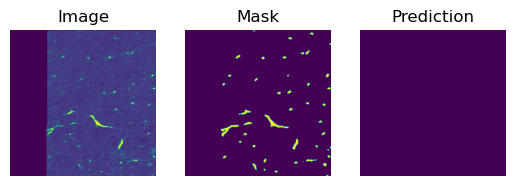

In [ ]:
# show results on random image
show_random_dataset_image_with_prediction(train_dataset, model, device)

In [ ]:
# show loss plot